In [1]:
import os
import numpy as np
import sys
import scipy 
import matplotlib.pyplot as plt
import pytest
sys.path.append("..")

In [2]:
os.getcwd()

'C:\\Users\\Lexi\\PycharmProjects\\brie\\notebooks'

In [3]:
# os.chdir("..\\brie")
# path=os.getcwd()
# os.listdir(path)

In [4]:
from brie.brie import Brie
from brie.lexi_brie import Lexi_Brie
from brie.alongshore_transporter import AlongshoreTransporter

In [5]:
xs=np.asarray([0, 0, 0, 100, 100, 100, 200, 200, 200, 300, 300, 300, 200, 200, 200, 100, 100, 100, 0, 0, 0])
wave_angle=np.asarray([45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45])
brie = Brie(inlet_model=False, bseed=True, alongshore_section_count=21, xs=xs, wave_angle=wave_angle)
lexi_brie = Lexi_Brie(inlet_model=False, bseed=True, alongshore_section_count=21, xs=xs, wave_angle=wave_angle)
transporter = AlongshoreTransporter(shoreline_x=xs,  wave_distribution=lexi_brie._wave_dist)

In [6]:
# master code
_, m_step = np.linspace(-90.0, 90.0, brie._wave_climl, retstep=True)
master_pdf = brie._angles.pdf(brie._angle_array) * np.deg2rad(m_step)

In [7]:
# alongshore transporter code
wave_pdf = lexi_brie._wave_dist.pdf
n_bins = 181
all_angles, step = np.linspace(-np.pi / 2.0, np.pi / 2.0, n_bins, retstep=True)
ast_pdf = wave_pdf(all_angles) * step

m_step: 1.005586592178771  degrees
lexi_step: 1.0  degrees


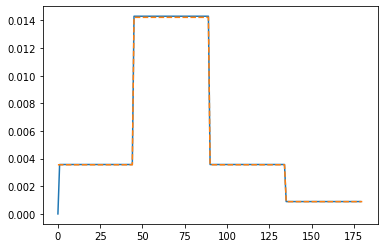

In [8]:
print("m_step:", m_step, " degrees")
print("lexi_step:", step*180/np.pi, " degrees")
# print(master_pdf-ast_pdf)
plt.plot(master_pdf)
plt.plot(ast_pdf, linestyle="dashed")

m_step: 1.005586592178771  degrees
l_step: 1.005586592178771  degrees
[-0.00358  0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.      

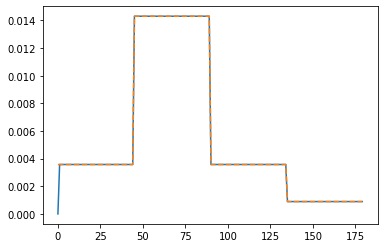

In [9]:
# using 180 bins instead for ast 
wave_pdf = lexi_brie._wave_dist.pdf
n_bins = 180
all_angles, step = np.linspace(-np.pi / 2.0, np.pi / 2.0, n_bins, retstep=True)
ast_pdf = wave_pdf(all_angles) * step
print("m_step:", m_step, " degrees")
print("l_step:", step*180/np.pi, " degrees")
print(np.round(master_pdf-ast_pdf, 5))
plt.plot(master_pdf)
plt.plot(ast_pdf, linestyle="dashed")

m_step: 1.005586592178771  degrees
lexi_step: 1.0  degrees


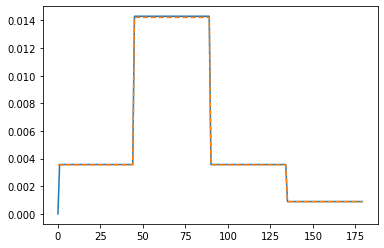

In [10]:
# other ast code for calculating pdf
all_angles2, step2 = np.linspace(-89.5, 89.5, n_bins, retstep=True)
all_angles2 = np.deg2rad(all_angles2)
ast_pdf2 = wave_pdf(all_angles2) * np.deg2rad(step2)
print("m_step:", m_step, " degrees")
print("lexi_step:", step2, " degrees")
plt.plot(master_pdf)
plt.plot(ast_pdf2, linestyle="dashed")

m_step: 1.005586592178771  degrees
lexi_step: 1.0  degrees
[-3.55555556e-03  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  1.98634389e-05  1.98634389e-05  1.98634389e-05
  1.98634389e-05  7.94537554e-05  7.94537554e-05  7.94537554e-05
  7.94537554e-05  7.94537554e-05  7.94537554e-05  7.94537554e-05
  7.94537554e-05  7.94537554e-05  7.94537554e-05  7.94537554e-05
  7.94537554e-05  7.94537554e-0

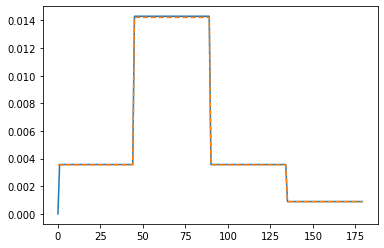

In [11]:
# using 180 bins instead of 181
# ast code same as one cell above
all_angles3, step3 = np.linspace(-89.5, 89.5, 180, retstep=True)
all_angles3 = np.deg2rad(all_angles3)
ast_pdf3 = wave_pdf(all_angles3) * np.deg2rad(step3)
print("m_step:", m_step, " degrees")
print("lexi_step:", step3, " degrees")
print(master_pdf-ast_pdf3)
plt.plot(master_pdf)
plt.plot(ast_pdf3, linestyle="dashed")

In [30]:
# AST master Brie comparisons
brie._angle_array, brie_step = np.linspace(
            -90.0, 90.0, brie._wave_climl, retstep=True
        )  # array of resolution angles for wave climate [radians]
brie._angle_array = np.deg2rad(
    brie._angle_array
)
all_angles, step = np.linspace(-np.pi / 2.0, np.pi / 2.0, 180, retstep=True)

if brie._angle_array == pytest.approx(all_angles):
    print("True")

True


In [34]:
wave_pdf = brie._angles.pdf(brie._angle_array) * np.deg2rad(brie_step)
e_phi_0 = lexi_brie._wave_dist.pdf(all_angles) * step
if wave_pdf == pytest.approx(e_phi_0):
    print("True")
else:
    print("False")

False
